In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

05/16/2018 15:24:40 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/16/2018 15:24:41 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/16/2018 15:24:43 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


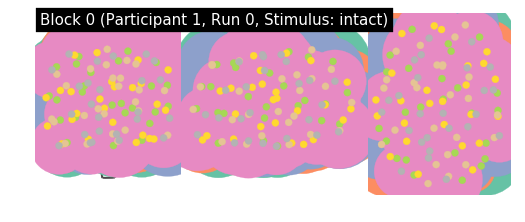

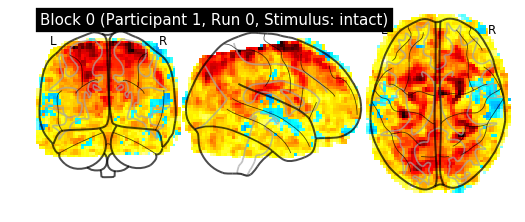

05/16/2018 15:26:48 Reconstruction Error (Frobenius Norm): 7.00913770e+03 out of 5.08479639e+03


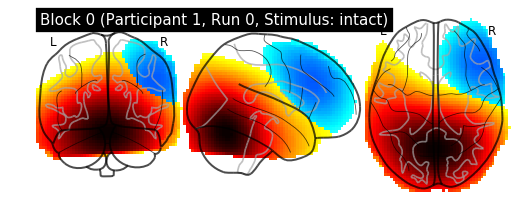

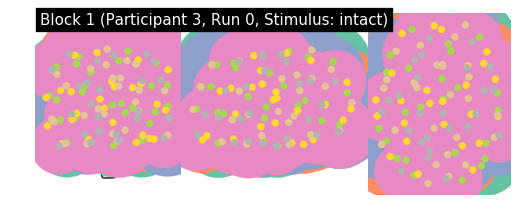

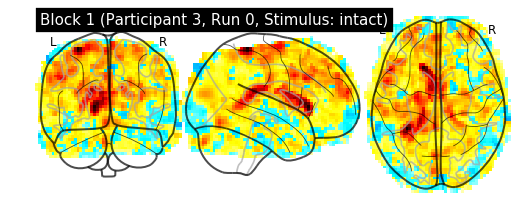

05/16/2018 15:27:14 Reconstruction Error (Frobenius Norm): 7.08973926e+03 out of 5.19534277e+03


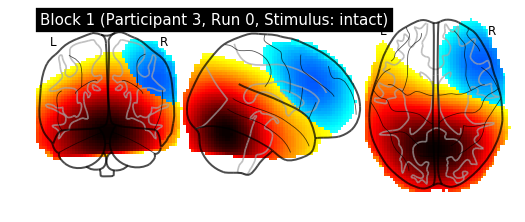

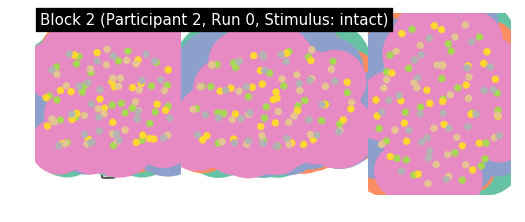

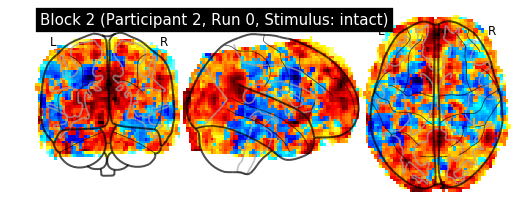

05/16/2018 15:27:40 Reconstruction Error (Frobenius Norm): 7.08973730e+03 out of 5.19534277e+03


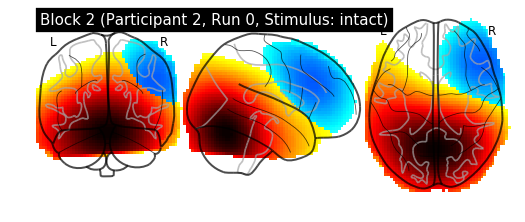

In [6]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [7]:
losses = dtfa.train(num_steps=500, learning_rate=5e-2, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, checkpoint_steps=10, blocks_batch_size=8)

05/16/2018 15:27:42 [Epoch 1] (1043ms) Posterior free-energy 2.20213297e+11
05/16/2018 15:27:42 Saving checkpoint...
05/16/2018 15:27:42 [Epoch 2] (891ms) Posterior free-energy 2.29820355e+10
05/16/2018 15:27:43 [Epoch 3] (911ms) Posterior free-energy 1.74218813e+10
05/16/2018 15:27:44 [Epoch 4] (902ms) Posterior free-energy 1.05134807e+10
05/16/2018 15:27:45 [Epoch 5] (919ms) Posterior free-energy 6.24727706e+09
05/16/2018 15:27:46 [Epoch 6] (900ms) Posterior free-energy 4.32820787e+09
05/16/2018 15:27:47 [Epoch 7] (894ms) Posterior free-energy 3.64527718e+09
05/16/2018 15:27:48 [Epoch 8] (892ms) Posterior free-energy 3.29479373e+09
05/16/2018 15:27:49 [Epoch 9] (911ms) Posterior free-energy 3.11587942e+09
05/16/2018 15:27:50 [Epoch 10] (894ms) Posterior free-energy 3.00686694e+09
05/16/2018 15:27:51 [Epoch 11] (919ms) Posterior free-energy 2.96781363e+09
05/16/2018 15:27:51 Saving checkpoint...
05/16/2018 15:27:51 [Epoch 12] (898ms) Posterior free-energy 2.92191488e+09
05/16/2018 15:

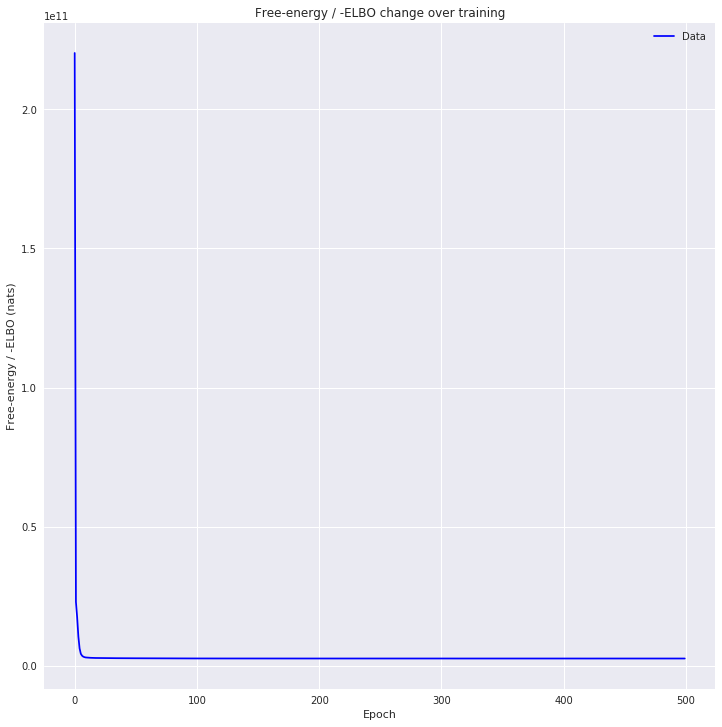

In [8]:
utils.plot_losses(losses)

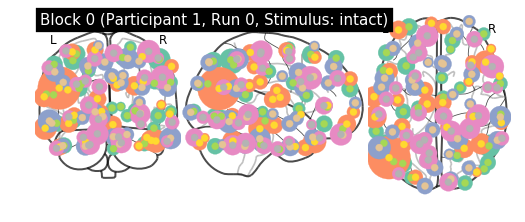

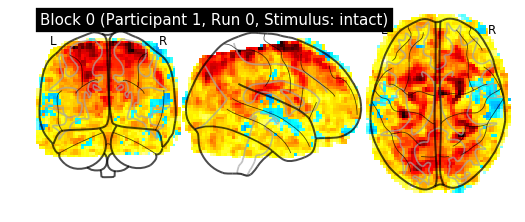

05/16/2018 15:35:39 Reconstruction Error (Frobenius Norm): 5.08644727e+03 out of 5.08479639e+03


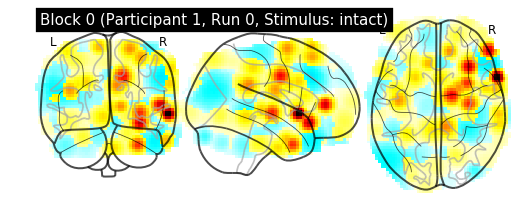

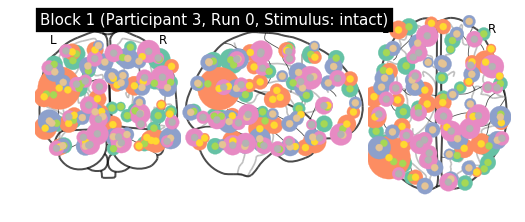

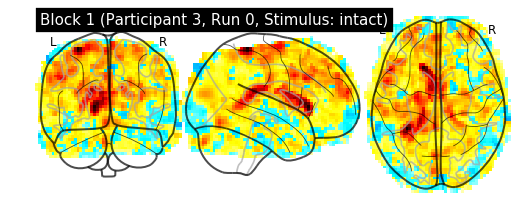

05/16/2018 15:36:05 Reconstruction Error (Frobenius Norm): 5.19687793e+03 out of 5.19534277e+03


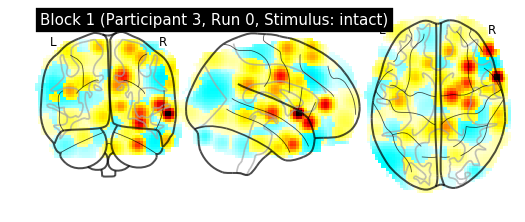

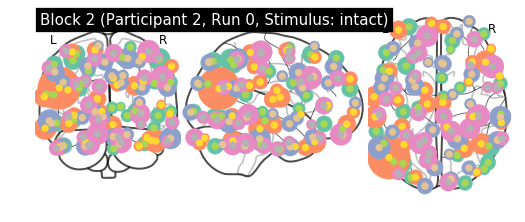

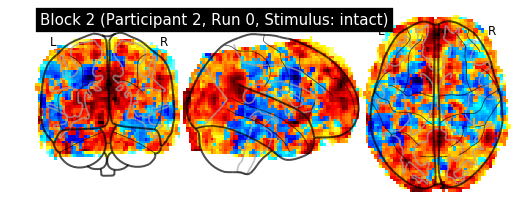

05/16/2018 15:36:32 Reconstruction Error (Frobenius Norm): 5.19679346e+03 out of 5.19534277e+03


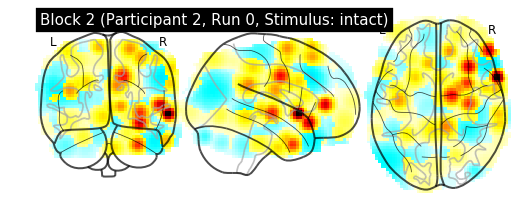

In [9]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [10]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


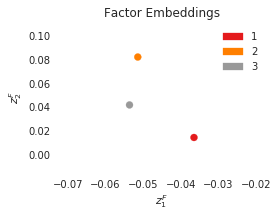

In [11]:
dtfa.scatter_factor_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


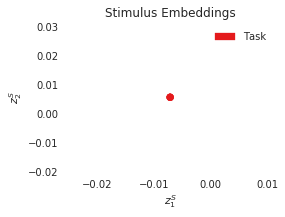

In [12]:
dtfa.scatter_task_embedding(t=None, labeler=task_rest_labeler)